# Calcular anomalias e visualização do ERA5

## Importar bibliotecas **`xarray`**

In [1]:
import xarray as xr

## Ler dados

In [2]:
ds = xr.open_dataset('../data/ERA5_PA_1980-2023.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 201, latitude: 101, time: 523)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 ... -35.5 -35.25 -35.0
  * latitude   (latitude) float32 -50.0 -50.25 -50.5 ... -74.5 -74.75 -75.0
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2023-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-16 13:24:27 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

Usando **`xarray`**, podemos visualizar nossos dados de forma mais estruturada. Vamos dar uma olhada na estrutura dos nossos dados. Ela é composta de coordenadas, variáveis e atributos.

In [4]:
ds.t2m.head()

<xarray.DataArray 't2m' (time: 5, latitude: 5, longitude: 5)>
array([[[283.34344, 283.3354 , 283.3309 , 283.3076 , 283.3022 ],
        [283.19815, 283.18472, 283.17307, 283.14346, 283.1363 ],
        [283.0251 , 283.017  , 283.00534, 282.98563, 282.98203],
        [282.86813, 282.85648, 282.84482, 282.82507, 282.8278 ],
        [282.704  , 282.7022 , 282.69864, 282.69235, 282.69415]],

       [[283.40802, 283.39996, 283.39816, 283.3847 , 283.39008],
        [283.2421 , 283.23224, 283.22775, 283.2143 , 283.22058],
        [283.06363, 283.06006, 283.05646, 283.0547 , 283.06363],
        [282.91208, 282.9058 , 282.9058 , 282.9076 , 282.92105],
        [282.7614 , 282.7596 , 282.7632 , 282.77487, 282.78833]],

       [[282.94348, 282.94974, 282.9614 , 282.9632 , 282.98022],
        [282.81882, 282.82062, 282.8242 , 282.8224 , 282.84033],
        [282.6816 , 282.6816 , 282.68787, 282.69327, 282.7094 ],
        [282.55334, 282.54886, 282.55334, 282.56232, 282.58026],
        [282.40448, 282.41254, 282.42422, 282.44394, 282.46097]],

       [[280.54538, 280.54718, 280.54898, 280.54358, 280.55884],
        [280.44403, 280.44763, 280.4575 , 280.4512 , 280.46735],
        [280.34628, 280.35974, 280.3732 , 280.37677, 280.38934],
        [280.27185, 280.27722, 280.2853 , 280.30322, 280.3149 ],
        [280.18576, 280.18576, 280.19382, 280.21356, 280.22522]],

       [[280.65927, 280.69244, 280.72385, 280.7418 , 280.77496],
        [280.55615, 280.58572, 280.61624, 280.63058, 280.66376],
        [280.427  , 280.4566 , 280.4853 , 280.5113 , 280.5427 ],
        [280.30234, 280.32385, 280.35077, 280.39023, 280.42163],
        [280.17142, 280.18665, 280.21265, 280.2575 , 280.29785]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 -84.25 -84.0
  * latitude   (latitude) float32 -50.0 -50.25 -50.5 -50.75 -51.0
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 1980-05-01
Attributes:
    units:      K
    long_name:  2 metre temperature

Agora vamos criar uma figura usando a função **`plot`** dentro de **`xarray`**.

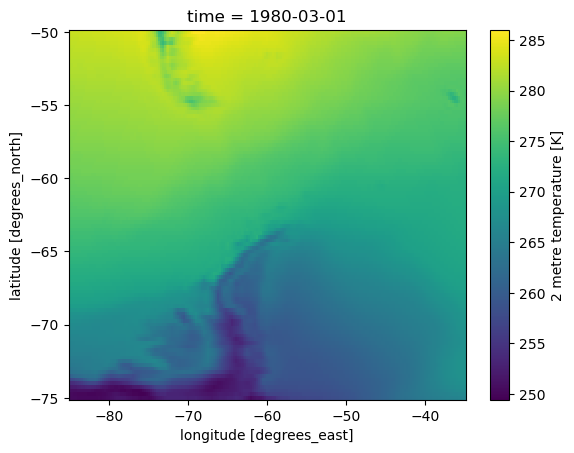

In [5]:
# Selecionaremos o tempo 1 e manteremos os lons e lats.
ds['t2m'][2].plot()

## Primeiro calculamos a média mensal usando **`groupby`**.

In [6]:
clm = ds.t2m.sel(time=slice('1980-01-01','2023-12-01')).groupby('time.month').mean(dim='time')
clm

<xarray.DataArray 't2m' (month: 12, latitude: 101, longitude: 201)>
array([[[282.31824, 282.32327, 282.3305 , ..., 279.2404 , 279.18445,
         279.11578],
        [282.2043 , 282.2083 , 282.216  , ..., 278.98578, 278.90738,
         278.83344],
        [282.08273, 282.09433, 282.10382, ..., 278.73914, 278.65982,
         278.5784 ],
        ...,
        [260.43607, 260.43158, 260.4259 , ..., 272.0384 , 272.03183,
         272.02472],
        [259.714  , 259.70847, 259.70242, ..., 271.99884, 271.9922 ,
         271.98535],
        [259.5779 , 259.69858, 259.78305, ..., 271.95538, 271.9532 ,
         271.95013]],

       [[282.78906, 282.7959 , 282.80414, ..., 279.84204, 279.78723,
         279.7181 ],
        [282.6591 , 282.66464, 282.673  , ..., 279.58875, 279.51163,
         279.43777],
        [282.5203 , 282.52908, 282.53806, ..., 279.35815, 279.28006,
         279.19632],
...
        [254.84482, 254.83258, 254.81866, ..., 265.6151 , 265.6268 ,
         265.63864],
        [253.99547, 253.98232, 253.96837, ..., 265.4619 , 265.47354,
         265.48486],
        [253.7959 , 253.89742, 253.96735, ..., 265.294  , 265.30276,
         265.30774]],

       [[281.25552, 281.26218, 281.2712 , ..., 278.02524, 277.97873,
         277.92575],
        [281.145  , 281.1501 , 281.15918, ..., 277.78735, 277.73004,
         277.67487],
        [281.03006, 281.0427 , 281.0535 , ..., 277.55603, 277.498  ,
         277.4327 ],
        ...,
        [260.09692, 260.09546, 260.09268, ..., 271.2853 , 271.28354,
         271.28152],
        [259.4076 , 259.405  , 259.40207, ..., 271.22342, 271.22174,
         271.2196 ],
        [259.29877, 259.42496, 259.514  , ..., 271.1547 , 271.15567,
         271.15475]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 ... -35.5 -35.25 -35.0
  * latitude   (latitude) float32 -50.0 -50.25 -50.5 ... -74.5 -74.75 -75.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

## Subtraímos os dados com a média climática mensal  

In [7]:
anm = (ds.t2m.groupby('time.month') - clm)
anm

<xarray.DataArray 't2m' (time: 523, latitude: 101, longitude: 201)>
array([[[ 1.02520752e+00,  1.01211548e+00,  1.00039673e+00, ...,
         -5.18798828e-02, -1.11999512e-02,  2.96630859e-02],
        [ 9.93835449e-01,  9.76409912e-01,  9.57061768e-01, ...,
         -1.05773926e-01, -5.24902344e-02, -9.94873047e-03],
        [ 9.42352295e-01,  9.22668457e-01,  9.01519775e-01, ...,
         -1.46118164e-01, -9.37194824e-02, -5.53283691e-02],
        ...,
        [-6.24206543e-01, -6.41235352e-01, -6.57073975e-01, ...,
         -2.50427246e-01, -2.43865967e-01, -2.36755371e-01],
        [-6.44683838e-01, -6.60675049e-01, -6.76177979e-01, ...,
         -2.70965576e-01, -2.64312744e-01, -2.57476807e-01],
        [-7.40875244e-01, -8.12225342e-01, -8.71582031e-01, ...,
         -3.27056885e-01, -3.13201904e-01, -3.00292969e-01]],

       [[ 6.18957520e-01,  6.04064941e-01,  5.94024658e-01, ...,
          1.38336182e-01,  1.26800537e-01,  1.21490479e-01],
        [ 5.83007812e-01,  5.67596436e-01,  5.54748535e-01, ...,
          1.31561279e-01,  1.24389648e-01,  1.16607666e-01],
        [ 5.43334961e-01,  5.30975342e-01,  5.18402100e-01, ...,
          1.16424561e-01,  1.10229492e-01,  9.26208496e-02],
...
          3.48776245e+00,  3.47070312e+00,  3.45257568e+00],
        [ 6.09481812e-01,  6.50436401e-01,  6.91284180e-01, ...,
          3.49478149e+00,  3.47689819e+00,  3.46017456e+00],
        [ 7.83935547e-01,  8.20526123e-01,  8.64486694e-01, ...,
          3.50665283e+00,  3.49969482e+00,  3.49291992e+00]],

       [[-5.43334961e-01, -5.58074951e-01, -5.63507080e-01, ...,
          2.08160400e-01,  1.68548584e-01,  1.71325684e-01],
        [-5.26977539e-01, -5.43731689e-01, -5.62683105e-01, ...,
          2.19146729e-01,  2.53143311e-01,  2.67944336e-01],
        [-5.13366699e-01, -5.32287598e-01, -5.50262451e-01, ...,
          2.82745361e-01,  3.19274902e-01,  3.63037109e-01],
        ...,
        [ 9.47174072e-01,  9.52209473e-01,  9.56787109e-01, ...,
          2.13867188e-01,  2.19238281e-01,  2.27539062e-01],
        [ 9.91699219e-01,  9.96063232e-01,  1.00079346e+00, ...,
          2.38098145e-01,  2.44262695e-01,  2.50000000e-01],
        [ 1.03054810e+00,  1.05233765e+00,  1.06912231e+00, ...,
          2.56591797e-01,  2.67272949e-01,  2.83447266e-01]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 ... -35.5 -35.25 -35.0
  * latitude   (latitude) float32 -50.0 -50.25 -50.5 ... -74.5 -74.75 -75.0
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2023-12-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

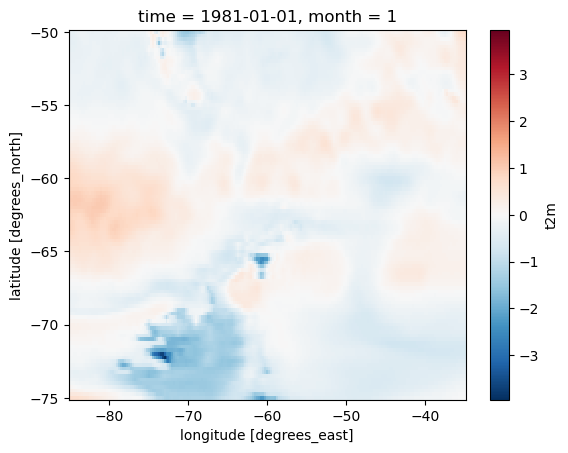

In [8]:
anm[12].plot()

### Vamos importar algumas funções do **`cartopy`**.

In [9]:
from cartopy.io.shapereader import Reader as ShapeReader
from cartopy.crs import PlateCarree

Definiremos uma projeção para uso posterior.

In [10]:
projection = PlateCarree()

###  Importamos o **`numpy`** para fazer algumas operações

In [11]:
import numpy as np

In [12]:
lat = anm['latitude']
lon = anm['longitude']
lon, lat = np.meshgrid(lon, lat)


### Importamos **`matplotlib`**.

In [13]:
from matplotlib import pyplot as plt

### Importamos **`cmaps`** e **`geocat.viz`**.

In [14]:
import cmaps
import geocat.viz as gv

### Agora vamos criar nossa figura

### Adicionamos a temperatura

In [15]:
import cartopy.feature as cf

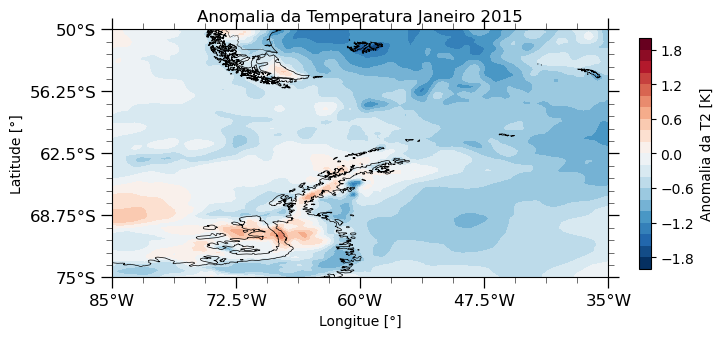

In [16]:
# Gerar uma figura (definir seu tamanho (largura, altura) em polegadas) e eixos usando o Cartopy
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection=projection)

# Aqui definimos os limites de nossa figura
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

# Podemos adicionar uma informação vetorial como um shapefile ou usar os shp do cartopy
#fname = '../data/shapefiles/vc965bq8111.shp'
#ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)
ax.add_feature(cf.COASTLINE.with_scale("10m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("10m"), lw=0.3)

# Agora adicionamos o campo de temperatura

cbar_kwargs = {'orientation':'vertical', 'shrink':0.6, "pad" : .05,
                'aspect':20, 'label':'Anomalia da T2 [K]'}

anm.sel(time='20150101').plot.contourf(ax=ax, transform=projection,
                                       cbar_kwargs=cbar_kwargs, levels=21)


# definimos as características dos "ticks".
gv.set_axes_limits_and_ticks(ax,
                             xticks=np.linspace(lon.min(), lon.max(), 5),
                             yticks=np.linspace(lat.min(), lat.max(), 5))

# Adição das latitudes e longitudes correspondentes
gv.add_lat_lon_ticklabels(ax)

# configuração de ticks maiores e menores
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=4,
                         y_minor_per_major=5,
                         labelsize=12)
ax.set_title('Anomalia da Temperatura Janeiro 2015')
ax.set_xlabel('Longitue [°]')
ax.set_ylabel('Latitude [°]')
fig.savefig('fig/Temp_anm_201501.png', dpi = 300, facecolor='w', bbox_inches = 'tight', 
            pad_inches = 0.1)